# Truncation error analysis

In [58]:
import numpy as np 
import src.animation

def analyseError(
    scheme,
    config,
    generateIC,
    analyticalSolution,
    N=5,
    increaseSpatialResolution = 2, 
    increaseTemporalResolution = 1, 
    debug=False,
    waveScheme = None, 
    advection = False,
    potential = None,
):
    NX    = config["resolution"]
    L     = config["domainSize"]
    tEnd  = config["tEnd"]
    dx    = L / NX
    dt    = config["dt"]
    error = np.zeros(N)

    resolutions = []
    average_timesteps = []

    for i in range(N):
        config["resolution"] = NX
        solver = scheme(config, generateIC)
        #solver.setExternalPotentialFunction(potential)
        if waveScheme is not None:
            waveSolver = waveScheme(config, generateIC)
            #waveSolver.setExternalPotentialFunction(potential)
        else:
            waveSolver = None 

        dx = solver.dx 
        nt = 0
        timesteps = [0]
        solver.run()
        if waveSolver is not None:
            waveSolver.run()

        if waveScheme is None:
            if advection:
                ana, _  = analyticalSolution(*solver.grid, solver.dx, solver.t)
            else:
                ana = np.abs(analyticalSolution(*solver.grid, solver.dx, solver.t)) ** 2
        else:
            ana = np.abs(waveSolver.getPsi())**2

        num = solver.getDensity()

        error[i] = np.mean(np.abs(num - ana))
        resolutions.append(dx)
        average_timesteps.append(np.mean(timesteps))

        if debug:
            print("dx ", dx, " dt ", np.mean(timesteps))
            print("error [i]: ", i, error[i])
            animation.drawFrame(solver, waveSolver = waveSolver, advection=advection)
            plt.show()

        NX *= increaseSpatialResolution
        NX = int(NX)
        dt /= increaseTemporalResolution
            
    return error, resolutions, average_timesteps

# Analyse accuracy of advection schemes

In [2]:
from IPython.display import display, Markdown, Latex 

%run src/advection_test_suite.py

In [3]:
test_list = ["gaussian", "tophat"]
schemes = ["upwind", "muscl", "ppm"]
error_lists = []
for t in test_list: 
    error_list = []
    for s in schemes: 
        config = getBaseConfig()
        config["fix1"] = True
        config["fix2"] = True
        e, _, _ = analyseError(
            algorithms[s],
            config,
            tests[t],
            tests[t],
            N=7,
            increaseSpatialResolution = 2, 
            increaseTemporalResolution = 1, 
            debug=False,
            waveScheme = None, 
            advection = True,
            potential = None,
        )
        error_list.append(e)

    error_lists.append(error_list)

Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps
Finished in 1821 time steps
Finished in 3641 time steps
Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps
Finished in 1821 time steps
Finished in 3641 time steps
Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps
Finished in 1821 time steps
Finished in 3641 time steps
Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps
Finished in 1821 time steps
Finished in 3641 time steps
Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps
Finished in 1821 time steps
Finished in 3641 time steps
Finished in 57 time steps
Finished in 114 time ste

/home/calab912/Documents/fdm-hybrid-scheme/src/fd.py:465: RuntimeWarning: divide by zero encountered in divide
  eta_bar = - ( (d2_ap - d2_am ) / ( 2 * dxi) ) * ( 2*dxi**3 / (ap - am) )
/home/calab912/Documents/fdm-hybrid-scheme/src/fd.py:465: RuntimeWarning: invalid value encountered in multiply
  eta_bar = - ( (d2_ap - d2_am ) / ( 2 * dxi) ) * ( 2*dxi**3 / (ap - am) )
/home/calab912/Documents/fdm-hybrid-scheme/src/fd.py:465: RuntimeWarning: overflow encountered in divide
  eta_bar = - ( (d2_ap - d2_am ) / ( 2 * dxi) ) * ( 2*dxi**3 / (ap - am) )


Finished in 456 time steps
Finished in 911 time steps
Finished in 1821 time steps
Finished in 3641 time steps


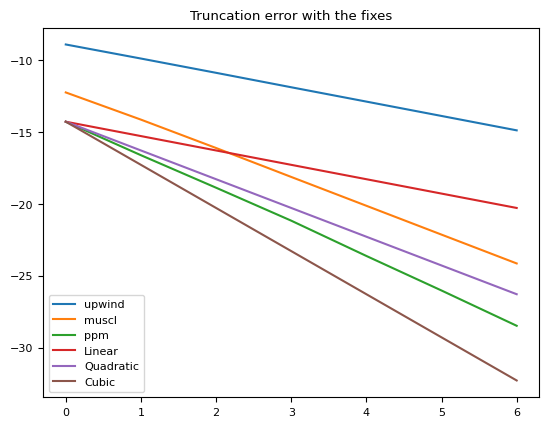

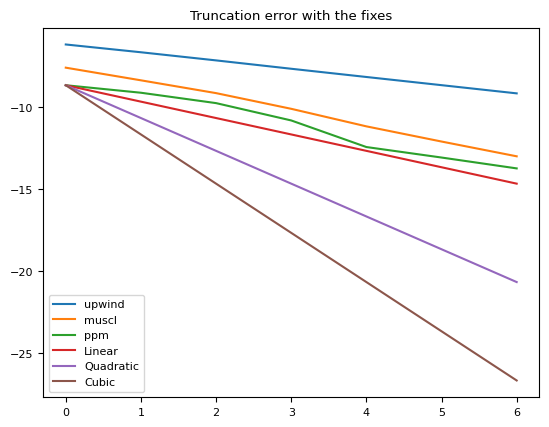

In [4]:
for j, t in enumerate(test_list): 
    e0 = error_lists[j][-1][0]
    xx = np.arange(len(error_lists[j][0]))
    plt.title("Truncation error with the fixes")
    for i, label in enumerate(schemes): 
        plt.plot(xx, np.log(error_lists[j][i])/np.log(2) , label=label)
    plt.plot(xx, np.log(e0 * 1/2**(xx)  ) / np.log(2), label="Linear")
    plt.plot(xx, np.log(e0 * 1/2**(2*xx)) / np.log(2), label="Quadratic")
    plt.plot(xx, np.log(e0 * 1/2**(3*xx)) / np.log(2), label="Cubic")
    plt.legend()
    plt.show()

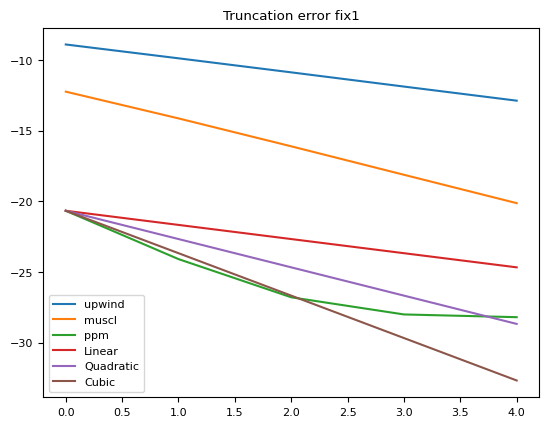

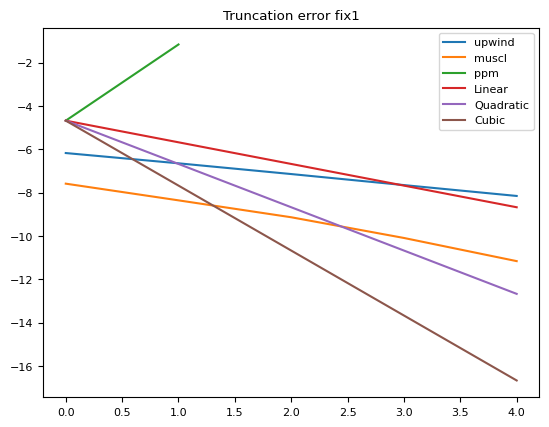

In [6]:
for j, t in enumerate(test_list): 
    e0 = error_lists[j][-1][0]
    xx = np.arange(len(error_lists[j][0]))
    plt.title("Truncation error fix1")
    for i, label in enumerate(schemes): 
        plt.plot(xx, np.log(error_lists[j][i])/np.log(2) , label=label)
    plt.plot(xx, np.log(e0 * 1/2**(xx)  ) / np.log(2), label="Linear")
    plt.plot(xx, np.log(e0 * 1/2**(2*xx)) / np.log(2), label="Quadratic")
    plt.plot(xx, np.log(e0 * 1/2**(3*xx)) / np.log(2), label="Cubic")
    plt.legend()
    plt.show()

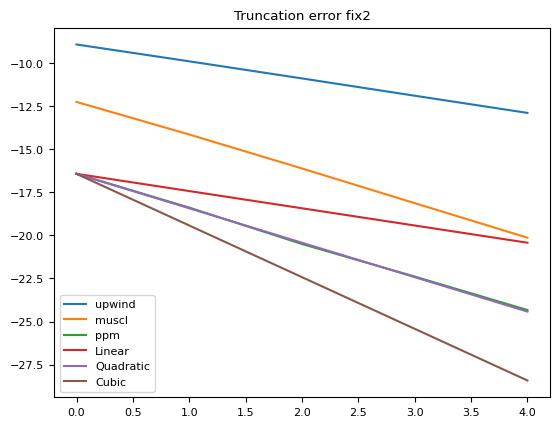

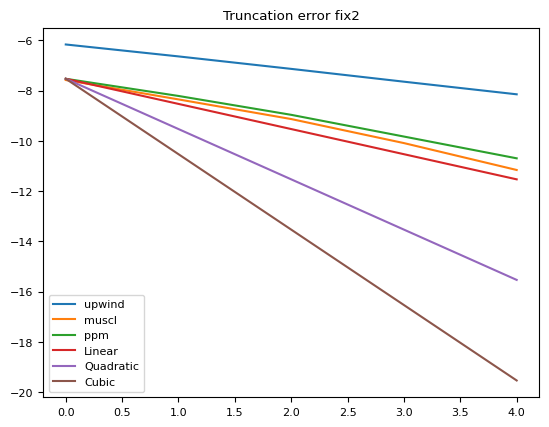

In [8]:
for j, t in enumerate(test_list): 
    e0 = error_lists[j][-1][0]
    xx = np.arange(len(error_lists[j][0]))
    plt.title("Truncation error fix2")
    for i, label in enumerate(schemes): 
        plt.plot(xx, np.log(error_lists[j][i])/np.log(2) , label=label)
    plt.plot(xx, np.log(e0 * 1/2**(xx)  ) / np.log(2), label="Linear")
    plt.plot(xx, np.log(e0 * 1/2**(2*xx)) / np.log(2), label="Quadratic")
    plt.plot(xx, np.log(e0 * 1/2**(3*xx)) / np.log(2), label="Cubic")
    plt.legend()
    plt.show()

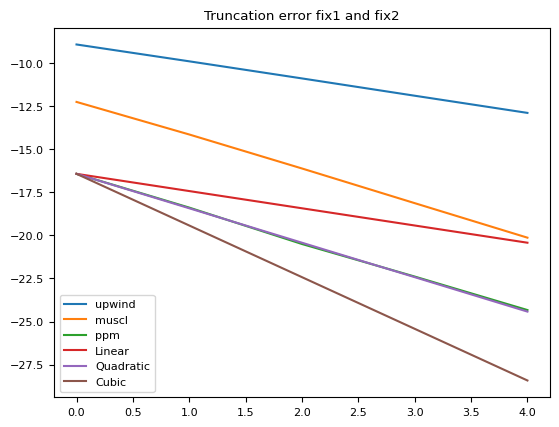

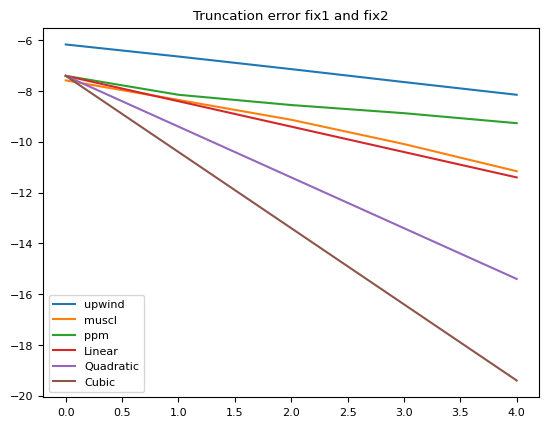

In [10]:
for j, t in enumerate(test_list): 
    e0 = error_lists[j][-1][0]
    xx = np.arange(len(error_lists[j][0]))
    plt.title("Truncation error fix1 and fix2")
    for i, label in enumerate(schemes): 
        plt.plot(xx, np.log(error_lists[j][i])/np.log(2) , label=label)
    plt.plot(xx, np.log(e0 * 1/2**(xx)  ) / np.log(2), label="Linear")
    plt.plot(xx, np.log(e0 * 1/2**(2*xx)) / np.log(2), label="Quadratic")
    plt.plot(xx, np.log(e0 * 1/2**(3*xx)) / np.log(2), label="Cubic")
    plt.legend()
    plt.show()

# Analyse accuracy of Schroedinger-schemes

In [3]:
from IPython.display import display, Markdown, Latex 

%run src/sps_test_suite.py

In [92]:

import numpy as np

import src.fd as fd
import src.schemes as schemes
import src.phase_schemes as ps

import matplotlib.pyplot as plt 

class PPMScheme(ps.PhaseScheme):
    def __init__(self, config, generateIC):
        super().__init__(config, generateIC)

        
        self.eta1 = 20
        self.eta2 = 0.05
        self.epsilon = 0.01 

        self.fix1 = config["fix1"]
        self.fix2 = config["fix2"]
        print(f"fix 1 {self.fix1} fix 2 {self.fix2}")

        self.vmax = 0
        self.amax = 0
        self.outputTimestep = False 

    def getName(self):
        return "ppm"

    def getUpdatedFields(self, dt, fields):
        if self.outputTimestep:
            print(f"dt = {dt} min density = {np.min(self.fields[0])} max density = {np.max(self.fields[0])}")

        density, phase = fields

        ddensity = np.zeros(density.shape)
        dphase   = np.zeros(phase.shape)

        sr = 0.5 * np.log(density)
        
        dxi     = self.dx
        eta1    = self.eta1
        eta2    = self.eta2
        epsilon = self.epsilon 

        self.vmax = 0
        self.amax = 0


        sr = 0.5 * np.log(density)

        for i in range(self.dimension):

            ### Cell-centered phase
            pc  = phase
            pp  = np.roll(phase,     fd.ROLL_R, axis = i)
            ppp = np.roll(phase, 2 * fd.ROLL_R, axis = i)
            pm  = np.roll(phase,     fd.ROLL_L, axis = i)
            pmm = np.roll(phase, 2 * fd.ROLL_L, axis = i)

            
            ### Face-centered velocities 
            v = fd.getDerivative(phase, dxi, self.c1_stencil, self.c1_coeff, axis = i)
            #vp2 = (pp - pc)/dxi
            #vm2 = np.roll(vp2, fd.ROLL_L, axis = i)
            vm2, vp2 = fd.computePPMInterpolation(v, dxi, i, eta1, eta2, epsilon, False, False)
            ##
            #d_p =                   p_R - p_L 
            #p_6 = 6 * (pc - 1/2 * ( p_R + p_L))
###
            #vm2 = 1/dxi * ( d_p + p_6 )
            #vp2 = 1/dxi * ( d_p - p_6 )
            #vp2 = np.roll(vm2, fd.ROLL_R, axis=i)


            #vp2 = fd.getDerivative(phase, dxi, self.f1_stencil, self.f1_coeff, axis = i)
            #vm2 = fd.getDerivative(phase, dxi, self.b1_stencil, self.b1_coeff, axis = i)
            #vm2 = np.roll(vp2, fd.ROLL_L, axis=i)#fd.getDerivative(phase, dxi, self.b1_stencil, self.b1_coeff, axis = i)

            #plt.plot("Forward velocity")
            #plt.plot(vp2, label="first order")
            #plt.plot(vp22, label="2nd order")
            #plt.legend()
            #plt.show()
            #plt.plot("backward velocity")
            #plt.plot(vm2, label="first order")
            #plt.plot(vm22, label="2nd order")
            #plt.legend()
            #plt.show()
            #plt.plot("backward velocity with roll")
            #plt.plot(vm2, label="first order")
            #plt.plot(np.roll(vp22, fd.ROLL_L, axis=i), label="2nd order")
            #plt.legend()
            #plt.show()
            #self.vmax = np.maximum(self.vmax, np.max(np.abs(vp2)))
            
            ### Density cell-averages
            #rho_i
            a   = density 
            a_L, a_R = fd.computePPMInterpolation(a, dxi, i, eta1, eta2, epsilon, self.fix1, self.fix2)

            ### Free parameters in approximation polynomial 
            ### a(xi) = a_L + x(d_a + a_6 ( 1 - x ))
            ### where x = (xi - xi_p)/dxi
            d_a =                  a_R - a_L 
            a_6 = 6 * (a - 1/2 * ( a_R + a_L))

            a_Lp = np.roll(a_L, fd.ROLL_R, axis=i) 
            d_ap = np.roll(d_a, fd.ROLL_R, axis=i)
            a_6p = np.roll(a_6, fd.ROLL_R, axis=i)

            a_Rm = np.roll(a_R, fd.ROLL_L, axis=i) 
            a_Lm = np.roll(a_L, fd.ROLL_L, axis=i) 
            d_am = np.roll(d_a, fd.ROLL_L, axis=i)
            a_6m = np.roll(a_6, fd.ROLL_L, axis=i)

            ### Compute density fluxes at i+1/2 as seen by cells centered at i (fp_R) and i + 1 (fp_L)
            y    =  vp2 * dt
            x    =  y / dxi
            fp_L = a_R  - x/2 * (d_a  - ( 1 - 2/3 * x) * a_6  )

            y    = -vp2 * dt
            x    =  y / dxi
            fp_R = a_Lp + x/2 * (d_ap + ( 1 - 2/3 * x) * a_6p )


            y    =  vm2 * dt
            x    =  y / dxi
            fm_L = a_Rm - x/2 * (d_am  - ( 1 - 2/3 * x) * a_6m)

            y    = -vm2 * dt
            x    =  y / dxi
            fm_R = a_L  + x/2 * (d_a   + ( 1 - 2/3 * x) * a_6 )

            ### Enforce upwinding for density fluxes abar
            a_bar_p2 = fp_L * vp2 * ( vp2 >= 0) + fp_R * vp2 * ( vp2 < 0 )
            a_bar_m2 = fm_L * vm2 * ( vm2 >= 0) + fm_R * vm2 * ( vm2 < 0 )

            ddensity += 1 / dxi * (a_bar_p2 - a_bar_m2)

            #v_i-1/2
            #v = fd.getDerivative(phase, dxi, self.c1_stencil, self.c1_coeff, axis = i)
            #
            #vm2, vp2 = fd.computePPMInterpolation(v, dxi, i, eta1, eta2, epsilon, self.fix1, self.fix2)
            #vp2 = fd.getDerivative(phase, dxi, self.f1_stencil, self.f1_coeff, axis = i)
            #vm2 = fd.getDerivative(phase, dxi, self.b1_stencil, self.b1_coeff, axis = i)
            vp2 = (-2*pm -3*pc+6*pp-1*ppp)/(6*1.0*dxi**1)
            vm2 = ( 1*pmm-6*pm+3*pc+2*pp )/(6*1.0*dxi**1)

            #Density 
            r  = density
            rf = np.roll(density, fd.ROLL_R, axis = i)
            rb = np.roll(density, fd.ROLL_L, axis = i)

            #Logarithm of density for quantum pressure
            srp = np.roll(sr, fd.ROLL_R, axis = i)
            srm = np.roll(sr, fd.ROLL_L, axis = i)

            ### COMPUTE QUANTUM PRESSURE ###
            #if self.turnOffDiffusion is False:
            #    dphase -= 0.5/dxi**2 * (0.25 * (srp - srm)**2 + (srp - 2 * sr + srm))
            
            dphase -= 0.5 * (
                  fd.getDerivative(sr, dxi, self.c1_stencil, self.c1_coeff, axis = i, derivative_order=1)**2 
                + fd.getDerivative(sr, dxi, self.c2_stencil, self.c2_coeff, axis = i, derivative_order=2)
                )

            ### COMPUTE OSHER-SETHIAN-FLUX ###

            if self.turnOffConvection is False:
                #Compute Osher-Sethian flux for phase
                dphase += (np.minimum(vp2, 0)**2 + np.maximum(vm2, 0)**2)/2

        return -dt * self.eta * np.array([ddensity, dphase])

hbar/m is 1.0
fix 1 False fix 2 True
hbar/m is 1.0
Finished in 2015 time steps
Finished in 209 time steps


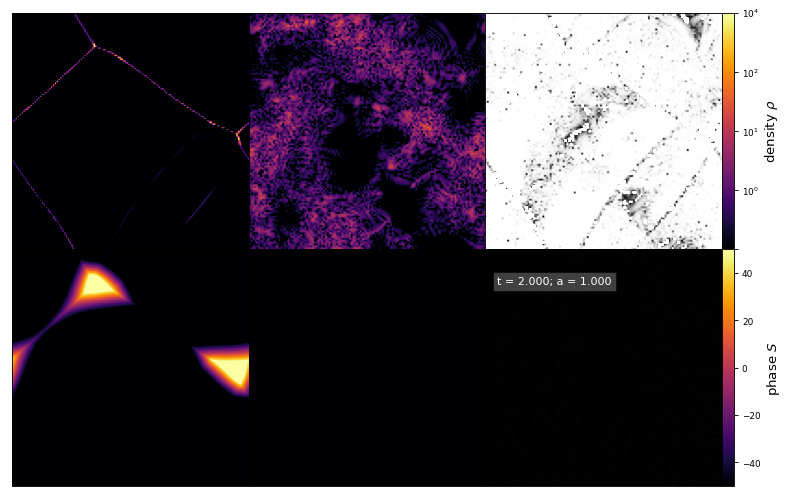

In [102]:

def cosmo2DConfig(c):
    c["dimension"] = 2
    c["usePeriodicBC"] = True
    c["domainSize"] = 32
    c["resolution"] = 128
    c["tEnd"] = 1.5
    c["slowDown"] = 10
    c["plotPhaseMod2"] = False
    c["phaseYlim"] = [-50, 50]
    c["densityYlim"] = [0, 1]
    c["gravity"] = 1
    c["fps"] = 20

test_list = {
    "standing wave": [tests.standingWave, standingWaveConfig, None],
    "harmonic oscillator convergence": [tests.generate1DUniform, oscillatorConvergenceConfig, lambda x, m: tests.oscillatorPotential1D(x, m, x0 = 0.5)],
    "harmonic oscillator eigenstate": [tests.oscillatorEigenstate1D, oscillatorEigenstateConfig, lambda x, m: tests.oscillatorPotential1D(x, m, x0 = 3)],
    "harmonic oscillator coherent state": [tests.oscillatorCoherentState1D, oscillatorCoherentStateConfig, lambda x, m: tests.oscillatorPotential1D(x, m, x0 = 7)],
    "infinite well": [tests.infiniteWell1D, infiniteWellConfig, None],
    "gaussian wave packet": [lambda x, dx, t, m, hbar: tests.li1(x, dx, t, m, hbar, x0=2), li1Config, None],
    "periodic gaussian wave packet": [lambda x, dx, t, m, hbar: tests.periodicLi1(x, dx, t, m, hbar, x0=2, L = 4), periodicLi1Config, None],
    "gaussian wave packet with background": [lambda x, dx, t, m=1, hbar=1: tests.periodicLi1(x, dx, t, m, hbar, x0=2) + 1, periodicLi1Config, None],
    "hubble expansion": [lambda x, dx, t, m, hbar: tests.li1(x, dx, t, m, hbar, x0=2, eps = 1e-4), li1Config, None],
    "wide hubble expansion": [lambda x, dx, t, m, hbar: tests.li1(x, dx, t, m, hbar, x0=5, eps = 1e-4), hubbleExpansionConfig, None],
    "quasi-shock": [lambda x, dx, t, m, hbar: tests.li2(x, dx, t, m, hbar, x0 = 10), li2Config, None],
    "wave packet collision": [tests.li3, li3Config, None],
    "travelling wave packet": [tests.travellingWavePacket, travellingWavePacketConfig, None],
    "perturbation wave": [tests.cosmological1D, perturbationWaveConfig, None],
    "accuracy test 1D": [lambda xx, dx, t, m = 1, hbar = 1: tests.cosmological1D(xx, dx, t, m, hbar, eps=1e-2, Lx=1, N = 1), accuracyTest1DConfig, None],
    "cosmo 1D": [lambda xx, dx, t, m, hbar: tests.cosmological1D(xx, dx, t, m, hbar, eps=5e-3, Lx=10, N=10), cosmoConfig, None],
    "perturbation wave 2D": [lambda x, y, dx, t, m, hbar: tests.cosmological2D(x, y, dx, t, m, hbar, Lx = 1, Ly = 1, N = 1, eps=5e-3), perturbationWave2DConfig, None],
    "cosmo 2D": [lambda x, y, dx, t, m, hbar: tests.cosmological2D(x, y, dx, t, m, hbar, Lx = 32, Ly = 32, N = 10, eps= 5e-2), cosmo2DConfig, None],
    "cosmo 2D test": [lambda x, y, dx, t, m, hbar: tests.cosmological2D(x, y, dx, t, m, hbar, Lx = 25, Ly = 25, N = 5, eps= 5e-3), cosmo2DTestConfig, None],
    "cosmo 2D expansion": [lambda x, y, dx, t, m, hbar: tests.cosmological2D(x, y, dx, t, m, hbar, Lx = 25, Ly = 25, N = 5, eps= 5e-3), cosmo2DExpansionConfig, None],
    "accuracy test 2D": [lambda x, y, dx, t, m, hbar: tests.cosmological2D(x, y, dx, t, m, hbar, Lx = 1, Ly = 1, N = 1, eps= 5e-3), accuracyTest2DConfig, None],
    "stability test 2D": [lambda xx, yy, dx, t, m, hbar: tests.cosmological2D(xx, yy, dx, t, m, hbar, eps=3e-5, Lx=1, Ly=1, N = 10), stabilityTest2DConfig, None],
    "perturbation wave 3D": [lambda x, y, z, dx, t, m, hbar: tests.cosmological3D(x, y, z, dx, t, m, hbar, Lx = 1, Ly = 1, Lz = 1, N = 1, eps=5e-3), perturbationWave3DConfig, None],
    "cosmo 3D test": [lambda x, y, z, dx, t, m, hbar: tests.cosmological3D(x, y, z, dx, t, m, hbar, Lx = 8, Ly = 8, Lz = 8, N = 3, eps=5e-3), cosmo3DTestConfig, None],
    "accuracy test 3D": [lambda x, y, z, dx, t, m, hbar: tests.cosmological3D(x, y, z, dx, t, m, hbar, Lx = 1, Ly = 1, Lz = 1, N = 1, eps=5e-3), accuracyTest3DConfig, None],
}

def ppmConfig(c):
    c["stencilOrder"] = 3
    c["timeOrder"]    = 3
    c["fix1"] = False
    c["fix2"] = True
    c["debug"] = True 
    c["phaseYlim"] = [-50, 50]
    c["C_parabolic"] =.4
    c["C_velocity"] = .5

test, testConfig, _ = test_list["cosmo 2D"]
c = getBaseConfig()
testConfig(c)
ppmConfig(c)
c["tEnd"] = 2
solver     = PPMScheme(c, test)
wavesolver = wave_schemes.SpectralScheme(c, test) 
#animation.createAnimation(solver = solver, label = "ppm", analyticalSolution = test, filename = "ppm", waveSolver = None)
solver.run()
wavesolver.run()
animation.drawFrame(solver = solver, label = "ppm", analyticalSolution = test, filename = "ppm", waveSolver = wavesolver)

# Test: accuracy test 1D

tEnd 0.3183098861837907
fix 1 False fix 2 True
Finished in 641 time steps
Finished in 641 time steps
dx  0.125  dt  0.0
error [i]:  0 2.049373014664816e-05


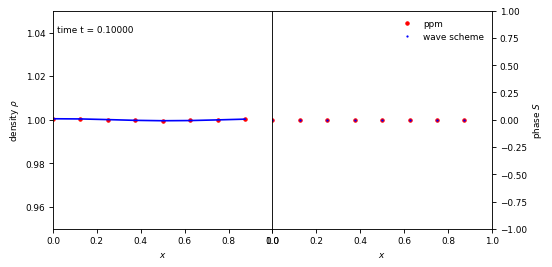

fix 1 False fix 2 True
Finished in 2560 time steps
Finished in 2560 time steps
dx  0.0625  dt  0.0
error [i]:  1 1.6789026422373185e-06


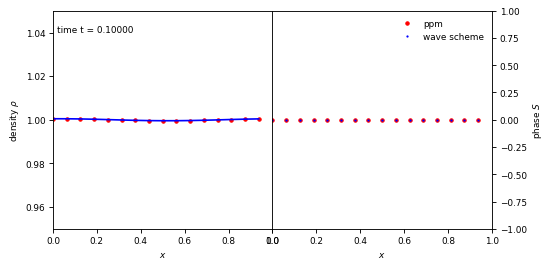

fix 1 False fix 2 True
Finished in 10240 time steps
Finished in 10240 time steps
dx  0.03125  dt  0.0
error [i]:  2 9.625637235291624e-08


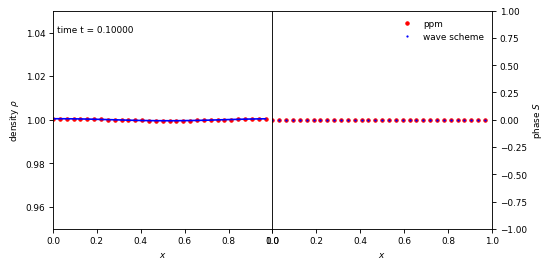

data/truncation_error_accuracy_test_1D_my_ppm.npz
tEnd 0.3183098861837907
Finished in 39 time steps
Finished in 39 time steps
dx  0.125  dt  0.0
error [i]:  0 6.91250352026363e-05


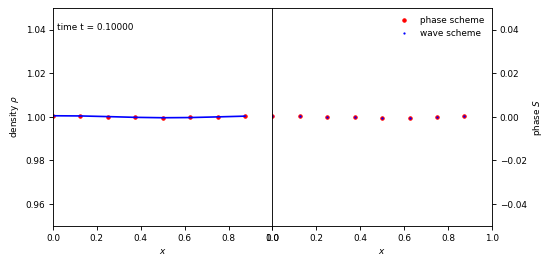

Finished in 154 time steps
Finished in 154 time steps
dx  0.0625  dt  0.0
error [i]:  1 1.747863523935694e-05


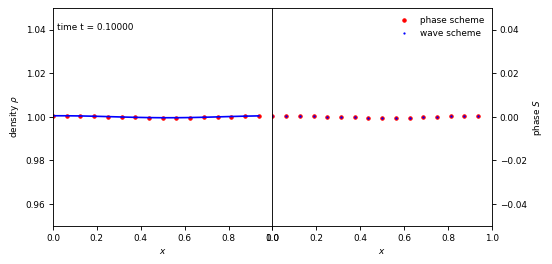

Finished in 615 time steps
Finished in 615 time steps
dx  0.03125  dt  0.0
error [i]:  2 4.349511317180877e-06


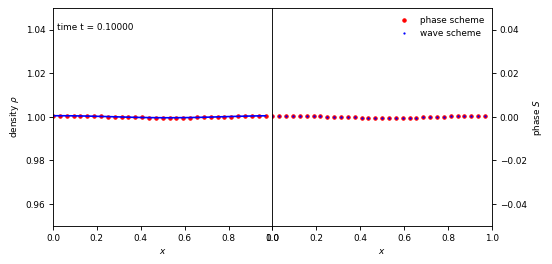

data/truncation_error_accuracy_test_1D_phase-ho-upwind.npz
tEnd 0.3183098861837907
Finished in 39 time steps
Finished in 39 time steps
dx  0.125  dt  0.0
error [i]:  0 6.916631812685431e-05


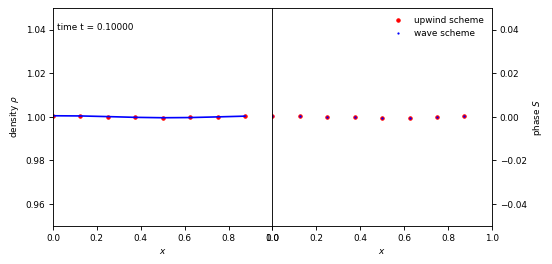

Finished in 154 time steps
Finished in 154 time steps
dx  0.0625  dt  0.0
error [i]:  1 1.751461834403339e-05


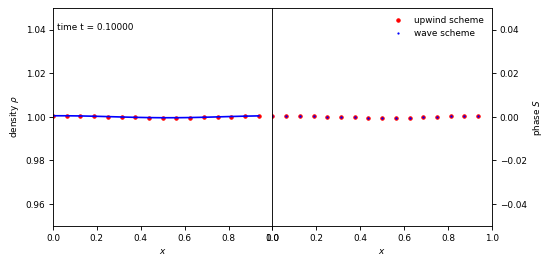

Finished in 615 time steps
Finished in 615 time steps
dx  0.03125  dt  0.0
error [i]:  2 4.367522308976091e-06


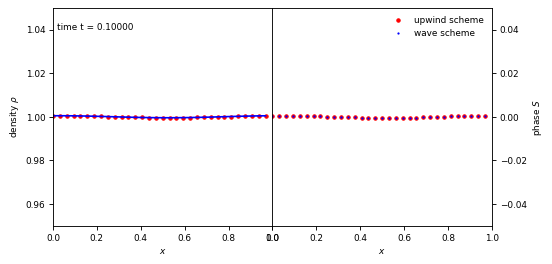

data/truncation_error_accuracy_test_1D_phase-upwind.npz


In [93]:
N = 3
#test_names_1d  = ['accuracy test']
#test_names  = ["harmonic oscillator coherent state"]
test_names  = ["accuracy test 1D"]
#test_names  = ['cosmo 2D']
#test_names = ['periodic gaussian wave packet']#, 'accuracy test 3D']
schemes_for_accuracy_test = ["my_ppm", "phase-ho-upwind", "phase-upwind"]#, "phase-ho-upwind_leer", "phase-ho-upwind_albada"]
#schemes_for_accuracy_test = ["phase-ho-upwind_albada"]"wave-ftcs2", "wave-ftcs4", 
advection  = False
waveScheme = wave_schemes.SpectralScheme

def ppmConfig(c):
    c["stencilOrder"] = 3
    c["timeOrder"]    = 2
    c["fix1"] = False
    c["fix2"] = True
    c["phaseYlim"] = [-1, 1]
    c["C_parabolic"] = 0.01

increaseSpatialResolution  = 2
increaseTemporalResolution = 1 
suffix = ""
plotRuns = True
scheme_list["my_ppm"] = [PPMScheme, ppmConfig] 

for test_name in test_names:
    test, testConfig, potential = test_list[test_name]

    display(Markdown('#' + " Test: " + test_name))

    truncations_errors = {}

    for scheme_name in schemes_for_accuracy_test:
        scheme, schemeConfig = scheme_list[scheme_name]

        c = getBaseConfig()
        testConfig(c)
        schemeConfig(c)
        c["tEnd"] = 0.1

        p, dx, dt = analyseError(
            scheme,
            c,
            test,
            test,
            N=N,
            increaseTemporalResolution = increaseTemporalResolution, 
            increaseSpatialResolution = increaseSpatialResolution,
            debug=plotRuns,
            waveScheme= waveScheme,
            advection = advection,
            potential = potential
        )

        truncations_errors[scheme_name] = {
            "errors": p,
            "dx": dx,
            "dt": dt
        }
        filename = "data/truncation_error_" + test_name.replace(" ", "_") + "_" + scheme_name.replace(" ", "_") + suffix + ".npz"
        print(filename)
        np.savez(filename, **(truncations_errors[scheme_name]))

[-15.57445788 -19.18405    -23.30854271]
[-13.82043216 -15.80404793 -17.81071525]
[-13.81957081 -15.80108092 -17.8047535 ]


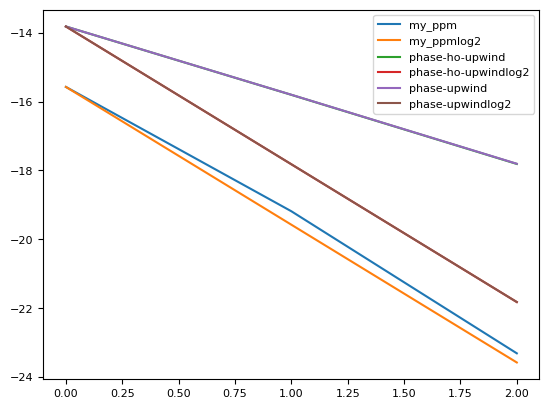

In [94]:
import matplotlib.pyplot as plt 

for key in truncations_errors.keys(): 
    print(np.log(truncations_errors[key]["errors"])/np.log(2))

    xx = np.arange(len(truncations_errors[key]["errors"]))
    plt.plot(np.log(truncations_errors[key]["errors"])/np.log(2), label=key)
    plt.plot(np.log(truncations_errors[key]["errors"][0]*1/2**(4*xx))/np.log(2), label=key + "log2")
plt.legend()

[-14.74091673 -16.81668708 -18.84869208]
[-13.82043216 -15.80404793 -17.81071525]
[-13.81957081 -15.80108092 -17.8047535 ]


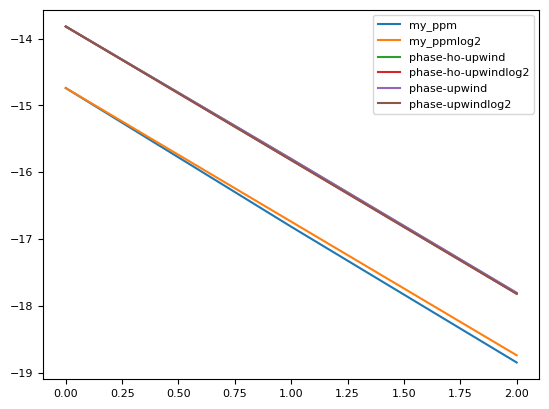

In [302]:
import matplotlib.pyplot as plt 

for key in truncations_errors.keys(): 
    print(np.log(truncations_errors[key]["errors"])/np.log(2))

    xx = np.arange(len(truncations_errors[key]["errors"]))
    plt.plot(np.log(truncations_errors[key]["errors"])/np.log(2), label=key)
    plt.plot(np.log(truncations_errors[key]["errors"][0]*1/2**(2*xx))/np.log(2), label=key + "log2")
plt.legend()

In [92]:

truncations_errors["phase-ho-upwind_mc"]

KeyError: 'phase-ho-upwind_mc is not a file in the archive'

In [89]:

truncations_errors = np.load("data/truncation_error_accuracy_test_1D_phase-ppm.npz")

for key in truncations_errors.keys(): 

    xx = np.arange(len(truncations_errors[key]["errors"]))
    print(truncations_errors[key]["errors"])